In [1]:
import pandas as pd
import numpy as np

# возьмём исходный текст для анализа
data = pd.read_csv(r'C:\Users\user\Desktop\Python\PROJECKT\CondaDataScience\NLP_delivery_food\food_data.csv')
data.head(3)

,Unnamed: 0,restoran_name,date,estimation,title,text
0,0,"Радуга вкуса, Служба доставки еды",11/05/2022 22:47,3,радуга быстро но не очень вкусно,здравствуйте дорогие читатели хочу рассказать ...
1,1,"Радуга вкуса, Служба доставки еды",20/05/2017 15:30,5,теперь я заказываю пиццу и роллы только здесь ...,здравствуйте в наше время трудно найти место в...
2,2,"Радуга вкуса, Служба доставки еды",18/11/2019 11:20,1,самая худшая служба доставки видимо у них мало...,всем привет сегодня я расскажу вам про самую п...


In [2]:
data.columns

Index(['Unnamed: 0', 'restoran_name', 'date', 'estimation', 'title', 'text'], dtype='object')

In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head(3)

,restoran_name,date,estimation,title,text
0,"Радуга вкуса, Служба доставки еды",11/05/2022 22:47,3,радуга быстро но не очень вкусно,здравствуйте дорогие читатели хочу рассказать ...
1,"Радуга вкуса, Служба доставки еды",20/05/2017 15:30,5,теперь я заказываю пиццу и роллы только здесь ...,здравствуйте в наше время трудно найти место в...
2,"Радуга вкуса, Служба доставки еды",18/11/2019 11:20,1,самая худшая служба доставки видимо у них мало...,всем привет сегодня я расскажу вам про самую п...


In [4]:
data.isnull().sum()

restoran_name    0
date             0
estimation       0
title            0
text             0
dtype: int64

In [5]:
data.describe()

,estimation
count,358.000000
mean,3.952514
std,1.437973
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [6]:
# количество пропущенных значений в столбцах
data.isnull().sum()


restoran_name    0
date             0
estimation       0
title            0
text             0
dtype: int64

In [7]:
#Названия Уникальных ресторанов доставки в df и количество записей о них
data['restoran_name'].value_counts()


GrowFood.pro - Grow Food - доставка готовой еды                                                      50
Много Порций - сервис по доставке готовой домашней еды, Санкт-Петербург                              50
«Своя компания» - доставка еды                                                                       48
Доставка еды Прием, Россия (прежнее название - Wow Food)                                             38
Сайт Доставка готовой еды на дом "Внук и Внучка" vnukivnuchka.ru                                     33
Радуга вкуса, Служба доставки еды                                                                    24
Доставка готовой еды на неделю "Шеф-повар Кук" Россия, Москва                                        12
Служба доставки еды "Радуга вкуса", Санкт-Петербург                                                  11
Роллы Доставка еды О! Суши                                                                           10
Автор доставка авторской еды, Тверь                             

In [8]:
 import matplotlib.pyplot as plt # Импортируем библиотеку

<AxesSubplot:>

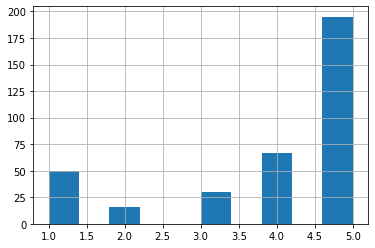

In [9]:
# Посмотрим на распределение оценок
data['estimation'].hist()

<AxesSubplot:>

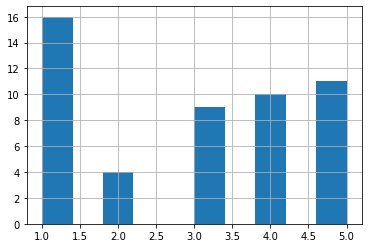

In [10]:
# отдельно посмотрим на распределение оценок для ресторана GrowFood.pro - Grow Food - доставка готовой еды
data[data['restoran_name'] == 'GrowFood.pro - Grow Food - доставка готовой еды']['estimation'].hist()

In [11]:
# Да у этого ресторана дела обстаят не очень

In [12]:
# Посмотрим как меняется средняя оценка за месяц за все годы
df = data

df["Date"] = pd.to_datetime(df["date"])
df["Date"].min(), df["Date"].max()
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df1 = df.groupby([df["Year"], "Month"])['estimation'].mean()
df1

Year  Month
2013  6        4.0
      7        5.0
      10       5.0
      11       4.0
2014  2        4.0
              ... 
2023  2        2.0
      4        5.0
      5        5.0
      7        1.0
      11       3.0
Name: estimation, Length: 100, dtype: float64

In [13]:
df = data
df["date"] = pd.to_datetime(df['date'])
df["year_month"] = df["date"].dt.to_period("M")
df1 = df.groupby(df["year_month"])['estimation'].mean()
df1 = pd.DataFrame(df1)

<AxesSubplot:title={'center':'Средняя оценка за каждый месяц ресторанов на сайте'}, xlabel='year_month', ylabel='mean_estimation'>

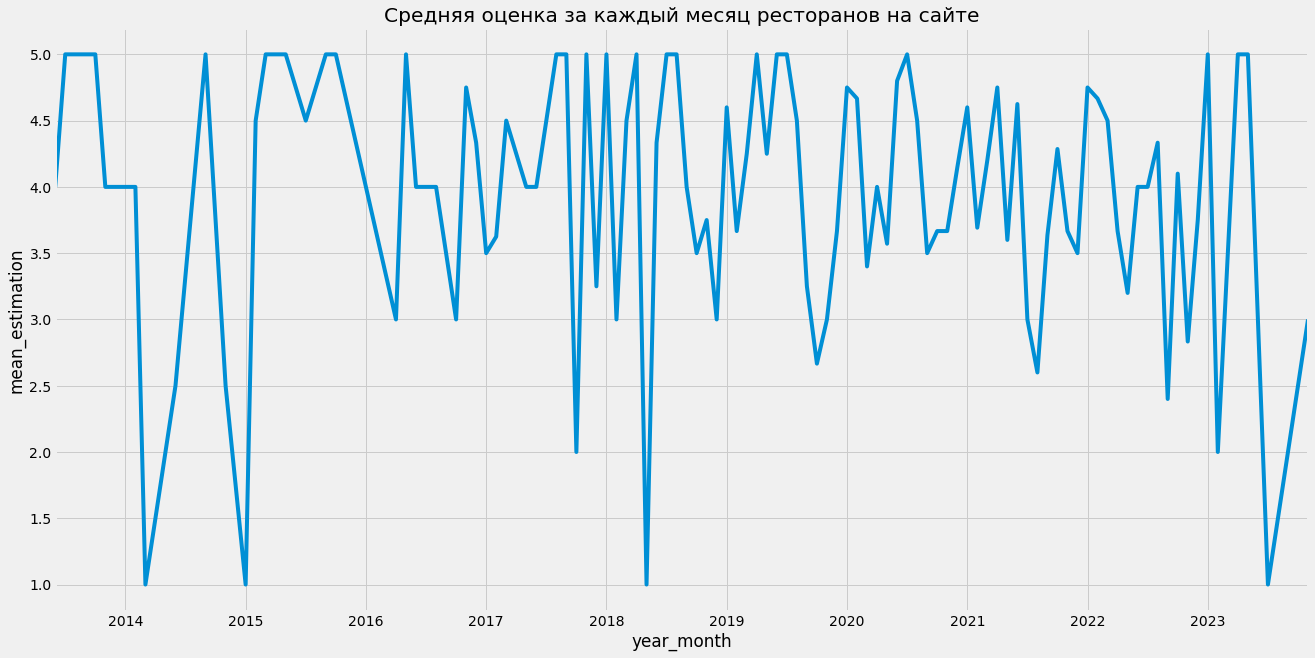

In [14]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20, 10))
plt.xlabel("Date")
plt.ylabel("mean_estimation")
plt.title("Средняя оценка за каждый месяц ресторанов на сайте")
df1["estimation"].plot()


In [15]:
# Кажется после 2019 года появился низходящий тренд. Средняя оценка падает вероятнее всего связана это с периодом пандемии

In [16]:
# Посмотрим такой же график для ресторана GrowFood.pro - Grow Food - доставка готовой еды

<AxesSubplot:title={'center':'Средняя за месяц оценка ресторана GrowFood.pro'}, xlabel='year_month', ylabel='mean_estimation'>

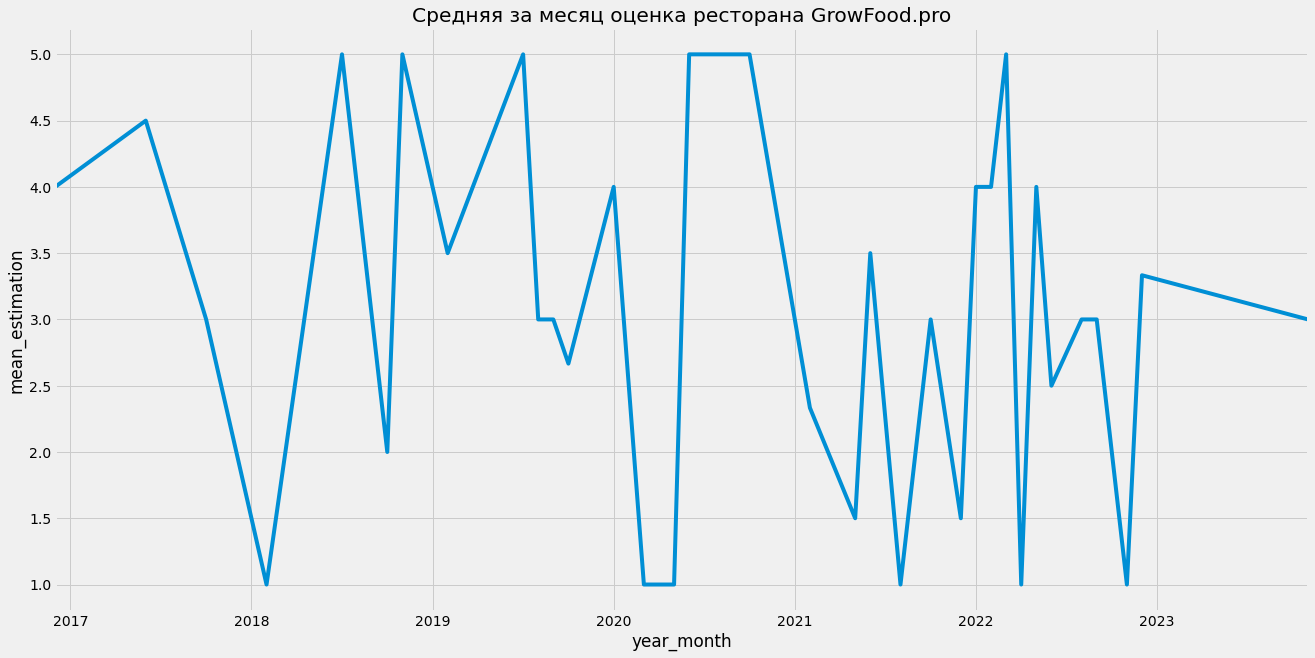

In [17]:
df = data[data['restoran_name'] == 'GrowFood.pro - Grow Food - доставка готовой еды']
# df["date"] = pd.to_datetime(df['date'])
# df["year_month"] = df["date"].dt.to_period("M")
df1 = df.groupby(df["year_month"])['estimation'].mean()
df1 = pd.DataFrame(df1)
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20, 10))
plt.xlabel("Date")
plt.ylabel("mean_estimation")
plt.title("Средняя за месяц оценка ресторана GrowFood.pro")
df1["estimation"].plot()

In [18]:
# Посмотрим как изменялась оценка по месяцу в годах (построение тепловой карты оценок)
import calendar
import seaborn as sns
table_df = pd.pivot_table(data, values=["estimation"], index=["Month"], columns=["Year"], fill_value=0, 
                          margins=True, aggfunc=np.mean)
mon_name = [['Jan', 'Feb', 'Mar', 'Apr',
             'May', 'Jun', 'Jul', 'Aug',
             'Sep','Oct', 'Nov', 'Dec', 'All']]
table_df = table_df.set_index(mon_name)
table_df

estimation                                                           \
Year       2013   2014      2015      2016      2017      2018      2019   
Jan         0.0  0.000  1.000000  0.000000  3.500000  5.000000  4.600000   
Feb         0.0  4.000  4.500000  0.000000  3.625000  3.000000  3.666667   
Mar         0.0  1.000  5.000000  0.000000  4.500000  4.500000  4.250000   
Apr         0.0  0.000  5.000000  3.000000  0.000000  5.000000  5.000000   
May         0.0  0.000  5.000000  5.000000  4.000000  1.000000  4.250000   
Jun         4.0  2.500  0.000000  4.000000  4.000000  4.333333  5.000000   
Jul         5.0  0.000  4.500000  0.000000  0.000000  5.000000  5.000000   
Aug         0.0  0.000  0.000000  4.000000  5.000000  5.000000  4.500000   
Sep         0.0  5.000  5.000000  0.000000  5.000000  4.000000  3.250000   
Oct         5.0  0.000  5.000000  3.000000  2.000000  3.500000  2.666667   
Nov         4.0  2.500  0.000000  4.750000  5.000000  3.750000  3.000000   
Dec         0.0  0.000  0.000000  4.333333  3.250000  3.000000  3.666667   
All         4.5  3.125  4.166667  4.250000  3.848485  3.961538  4.139535   

                                                   
Year      2020      2021      2022 2023       All  
Jan   4.750000  4.600000  4.750000  5.0  4.285714  
Feb   4.666667  3.692308  4.666667  2.0  3.763158  
Mar   3.400000  4.200000  4.500000  0.0  4.068966  
Apr   4.000000  4.750000  3.666667  5.0  4.347826  
May   3.571429  3.600000  3.200000  5.0  3.714286  
Jun   4.800000  4.625000  4.000000  0.0  4.292683  
Jul   5.000000  3.000000  4.000000  1.0  4.115385  
Aug   4.500000  2.600000  4.333333  0.0  4.125000  
Sep   3.500000  3.636364  2.400000  0.0  3.571429  
Oct   3.666667  4.285714  4.100000  0.0  3.875000  
Nov   3.666667  3.666667  2.833333  3.0  3.612903  
Dec   4.142857  3.500000  3.750000  0.0  3.733333  
All   4.185185  3.850575  3.830986  3.5  3.952514

Text(93.7, 0.5, 'Months')

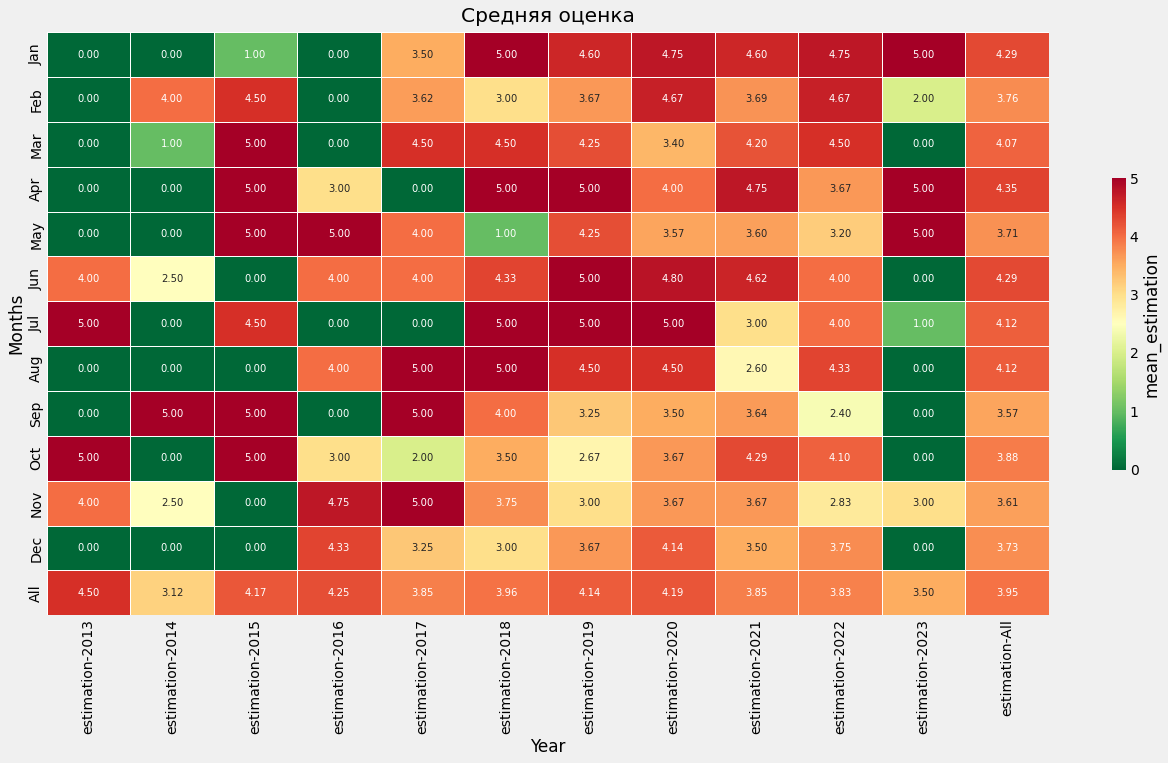

In [19]:
plt.figure(figsize = (20,10))
ax = sns.heatmap(table_df, cmap='RdYlGn_r', robust=False, fmt='.2f', annot=True, linewidths=.6, 
                 annot_kws={'size':10}, cbar_kws={'shrink':.5, 'label':'mean_estimation'})

plt.title('Средняя оценка', pad=10)
plt.xlabel('Year')
plt.ylabel('Months')              
                       

In [20]:
#pip install pymorphy2

# Обработка естественного языка

In [21]:
# возьмём исходный текст для анализа импортируем библиотеку nltk
import nltk
import pymorphy2
# импортируем метод sent_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [22]:
# токенизируем, удалим стоп-слова и лемматизируем текст

In [23]:
# скачиваем модель, которая будет делить на предложения
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [25]:
# Зазделение на слова, удаление стоп слов и знаков пунктуации Лемматизация приведение слов к нижнему регистру

In [26]:
def word_token(text, stop_words, punctuation_marks, morph):
    text = str(text)
    tokens = word_tokenize(text.lower())
    prep_text = []
    for token in tokens:
        if token not in punctuation_marks:
            lemma = morph.parse(token)[0].normal_form
            if lemma not in stop_words:
                prep_text.append(lemma)
    return prep_text      

In [27]:
punctuation_marks = ['!', ',', '(', '.', ')', ':', '-', '?', '..', '...']
stop_words = stopwords.words("russian")  
morph = pymorphy2.MorphAnalyzer()


In [28]:
data['Preprocessed_texts'] = data.apply(lambda row: word_token(row['text'], stop_words, punctuation_marks, morph), axis=1)

In [29]:
data['Preprocessed_texts'] 

0      [здравствуйте, дорогой, читатель, хотеть, расс...
1      [здравствуйте, наш, время, трудно, найти, мест...
2      [весь, привет, сегодня, рассказать, самый, пло...
3      [кроме, быстрый, доставка, плюс, порезать, уло...
4      [хороший, служба, доставка, еда, заказывать, п...
                             ...                        
353    [очередной, писать, отзыв, служба, доставка, е...
354    [здравствуйте, дорогой, читатель, долгий, врем...
355    [добрый, день, дорогой, читатель, мочь, сказат...
356    [добрый, время, сутки, ролл, обычно, покупать,...
357    [фастфуд, равнодушный, больший, противница, ма...
Name: Preprocessed_texts, Length: 358, dtype: object

In [30]:
# Определение тональности текста с помощью мешка слов
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter

In [31]:
#Считаем частоту слов во всех отзывах (мешок слов)
words = Counter()
for txt in data['Preprocessed_texts']:
    words.update(txt)
words

Counter({'здравствуйте': 22,
         'дорогой': 31,
         'читатель': 11,
         'хотеть': 187,
         'рассказать': 66,
         'сегодня': 57,
         'пожалуй': 12,
         'известный': 13,
         'спорный': 5,
         'служба': 99,
         'доставка': 1022,
         'ролл': 405,
         'казань': 3,
         'радуга': 40,
         'вкус': 389,
         'реклама': 22,
         'вылезать': 1,
         'интернет': 19,
         'листовка': 9,
         'кидать': 1,
         'почтовый': 6,
         'ящик': 6,
         'слышать': 15,
         'глухой': 1,
         'цена': 257,
         'действительно': 89,
         'значительно': 8,
         'ниже': 21,
         'большинство': 28,
         'поздний': 37,
         'сначала': 34,
         'плюс': 122,
         'приложение': 90,
         'оно': 57,
         'удобный': 116,
         'выбрать': 187,
         'любой': 69,
         'блюдо': 956,
         'разделение': 3,
         'категория': 12,
         'экономный': 4,
         

In [32]:
# Посмотрим на мешок слов негативных отзывов для ресторана GrowFood.pro
df = data[(data['restoran_name'] == 'GrowFood.pro - Grow Food - доставка готовой еды') & (data['estimation'] < 3)] 
grow_food = Counter()
for txt in df['Preprocessed_texts']:
    grow_food.update(txt)
x = sorted(dict(grow_food).items(), key=lambda x: -x[1])[0:20]
x

[('это', 100),
 ('день', 97),
 ('еда', 73),
 ('доставка', 61),
 ('всё', 58),
 ('блюдо', 44),
 ('сервис', 41),
 ('заказ', 39),
 ('время', 37),
 ('который', 36),
 ('очень', 34),
 ('компания', 29),
 ('решить', 28),
 ('состав', 25),
 ('мочь', 24),
 ('питание', 24),
 ('свой', 24),
 ('ещё', 23),
 ('продукт', 22),
 ('деньга', 22)]

In [33]:
# Словарь, отображающий слова в коды
word_to_index = dict()
# Словарь, отображающий коды в слова
index_to_word = dict()
# константы
max_words = 10000
random_state = 42

In [34]:
#Создаем словари
for i, word in enumerate(words.most_common(max_words - 2)):
    word_to_index[word[0]] = i + 2
    index_to_word[i + 2] = word[0]

In [35]:
#Функция для преобразования списка слов в список кодов
def text_to_sequence(txt, word_to_index):
    seq = []
    for word in txt:
        index = word_to_index.get(word, 1) # 1 означает неизвестное слово
        # Неизвестные слова не добавляем в выходную последовательность
        if index != 1:
            seq.append(index)
    return seq

In [36]:
#Преобразуем все тексты в последовательность кодов слов
data['Sequences'] = data.apply(lambda row: text_to_sequence(row['Preprocessed_texts'], word_to_index), axis=1)

In [37]:
data['Sequences']

0      [696, 508, 1221, 52, 220, 253, 1154, 1075, 210...
1      [696, 83, 14, 1076, 211, 107, 12, 30, 11, 5, 1...
2      [10, 277, 253, 220, 55, 363, 126, 4, 5, 12, 35...
3      [511, 266, 4, 92, 1159, 3577, 13, 18, 509, 122...
4      [38, 126, 4, 5, 26, 386, 110, 384, 19, 476, 99...
                             ...                        
353    [782, 299, 46, 126, 4, 5, 1412, 46, 9662, 390,...
354    [696, 508, 1221, 576, 14, 26, 18, 68, 126, 4, ...
355    [325, 8, 508, 1221, 24, 43, 9679, 99, 121, 9, ...
356    [325, 14, 408, 18, 181, 472, 9686, 2309, 1617,...
357    [1139, 2327, 69, 9689, 9690, 582, 76, 346, 10,...
Name: Sequences, Length: 358, dtype: object

In [38]:
#Создаем мешок слов (функция векторизация)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for index in sequence:
            results[i, index] += 1.
    return results

In [39]:
vektorize = vectorize_sequences(data['Sequences'], max_words) # Вектора каждого отзыва np

In [40]:
# После создания векторов попробуем их кластеризовать

In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2).fit(vektorize)

In [42]:
#Запишем результаты кластеризации в df

In [43]:
k_means_pred = kmeans.predict(vektorize)

In [44]:
data['k_means_pred'] = k_means_pred

In [45]:
data.head(3)

,restoran_name,date,estimation,title,text,Date,Year,Month,year_month,Preprocessed_texts,Sequences,k_means_pred
0,"Радуга вкуса, Служба доставки еды",2022-11-05 22:47:00,3,радуга быстро но не очень вкусно,здравствуйте дорогие читатели хочу рассказать ...,2022-11-05 22:47:00,2022,11,2022-11,"[здравствуйте, дорогой, читатель, хотеть, расс...","[696, 508, 1221, 52, 220, 253, 1154, 1075, 210...",1
1,"Радуга вкуса, Служба доставки еды",2017-05-20 15:30:00,5,теперь я заказываю пиццу и роллы только здесь ...,здравствуйте в наше время трудно найти место в...,2017-05-20 15:30:00,2017,5,2017-05,"[здравствуйте, наш, время, трудно, найти, мест...","[696, 83, 14, 1076, 211, 107, 12, 30, 11, 5, 1...",1
2,"Радуга вкуса, Служба доставки еды",2019-11-18 11:20:00,1,самая худшая служба доставки видимо у них мало...,всем привет сегодня я расскажу вам про самую п...,2019-11-18 11:20:00,2019,11,2019-11,"[весь, привет, сегодня, рассказать, самый, пло...","[10, 277, 253, 220, 55, 363, 126, 4, 5, 12, 35...",1


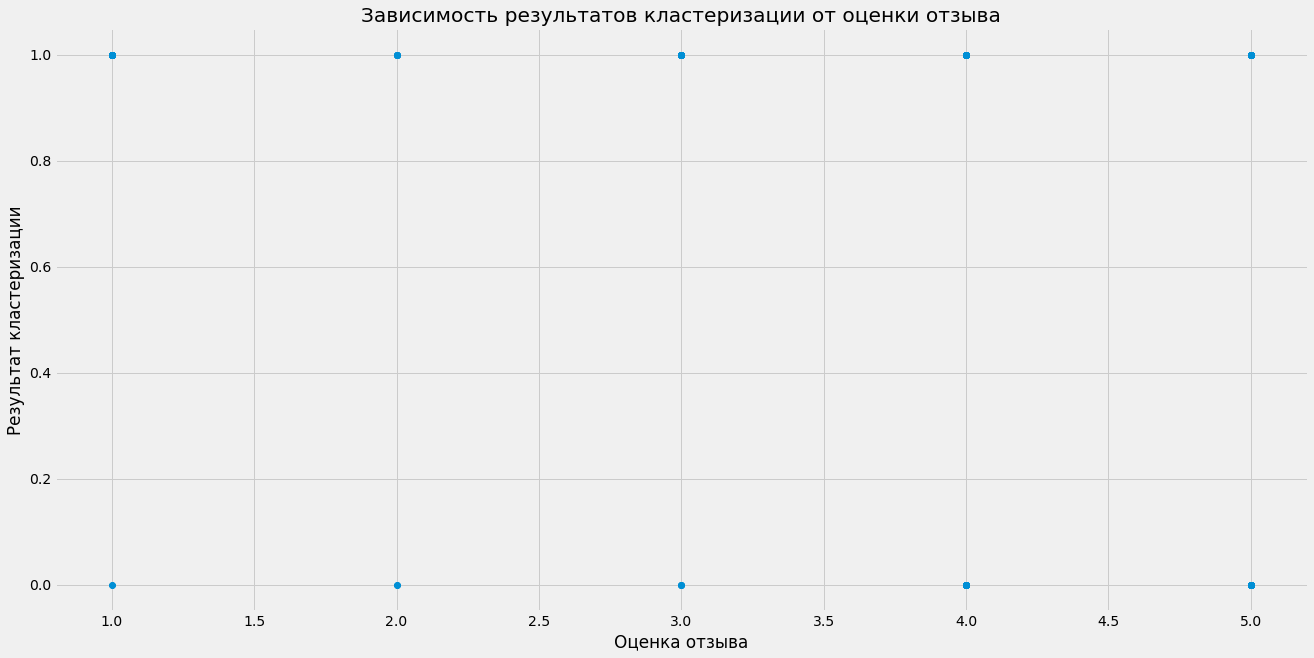

In [46]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20, 10))
plt.xlabel("Оценка отзыва")
plt.ylabel("Результат кластеризации")
plt.title("Зависимость результатов кластеризации от оценки отзыва")
plt.scatter(data['estimation'], data['k_means_pred'])

#Результаты кластеризации не совпадают с оценкой отзыва!!!

#  Обучение модели для определения оценки отзыва с помощью векторов

In [47]:
# Выделяем данные для обучения и тестирования (разделяем данные на 2 выборки)
train, test = train_test_split(data, test_size=0.2)

In [48]:
train.head(3)

,restoran_name,date,estimation,title,text,Date,Year,Month,year_month,Preprocessed_texts,Sequences,k_means_pred
129,GrowFood.pro - Grow Food - доставка готовой еды,2021-12-11 12:47:00,1,мертвая еда,лет за пять я перепробовал компании по продаже...,2021-12-11 12:47:00,2021,12,2021-12,"[год, пять, перепробовать, компания, продажа, ...","[99, 688, 2665, 48, 4179, 34, 5, 446, 25, 162,...",1
308,Сеть ресторанов Донер 42 — еда и доставка,2022-04-03 15:18:00,5,классные,вкусно есть донеры и в булке и в лаваше мясное...,2022-04-03 15:18:00,2022,4,2022-04,"[вкусно, донера, булка, лаваш, мясной, меню, о...","[42, 9049, 3539, 2570, 287, 17, 3, 267, 90, 6,...",1
123,GrowFood.pro - Grow Food - доставка готовой еды,2022-04-27 18:10:00,1,как grow пробил дно и что с этим делать,привет был знаком с этой доставкой готового пи...,2022-04-27 18:10:00,2022,4,2022-04,"[привет, знак, доставка, готовый, питание, зао...","[277, 2534, 4, 34, 51, 6151, 13, 202, 26, 162,...",1


In [49]:
# Выделим данные для обучения
x_train_seq = train['Sequences']
y_train = train['estimation']

In [50]:
# Данные для тестирования
x_test_seq = test['Sequences']
y_test = test['estimation']

In [51]:
x_train = vectorize_sequences(x_train_seq, max_words)

In [52]:
x_test = vectorize_sequences(x_test_seq, max_words)

In [53]:
#Создаем модель машинного обучения

In [54]:
lr = LogisticRegression(random_state=random_state, max_iter=500)

In [55]:
# Обучаем модель
lr.fit(x_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [56]:
# Оцениваем качество обучения на тестовом наборе данных
lr.score(x_test, y_test)

0.5555555555555556